IRISCLASSIFICATION(RANDOM FOREST(Vijay Ragavan))

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np

# --- 1. Model Training (Required to generate the object to save) ---

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/model/Iris (1).csv")
df = df.drop('Id', axis=1)
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Model Trained.")

# --- 2. Save the Model to a .pkl File ---
pkl_filename = "random_forest_model.pkl"

try:
    # 'wb' mode is for writing in binary
    with open(pkl_filename, 'wb') as file:
        # pickle.dump() serializes the Python object (rf_model) into a binary file
        pickle.dump(rf_model, file)

    print(f"\nSUCCESS: Model saved to '{pkl_filename}'")

except Exception as e:
    print(f"\nERROR: Could not save the model. Details: {e}")


# --- 3. Load the Model from the .pkl File (Verification) ---
loaded_model = None
try:
    # 'rb' mode is for reading in binary
    with open(pkl_filename, 'rb') as file:
        loaded_model = pickle.load(file)

    print(f"SUCCESS: Model loaded from '{pkl_filename}'")

    # Verify the loaded model works by making a test prediction
    sample_to_predict = X_test.iloc[[0]]
    loaded_prediction = loaded_model.predict(sample_to_predict)

    print("-" * 50)
    print(f"Sample features:\n{sample_to_predict.iloc[0].to_string()}")
    print(f"Prediction using loaded model: {loaded_prediction[0]}")

except Exception as e:
    print(f"\nERROR: Could not load or verify the model. Details: {e}")

Random Forest Model Trained.

SUCCESS: Model saved to 'random_forest_model.pkl'
SUCCESS: Model loaded from 'random_forest_model.pkl'
--------------------------------------------------
Sample features:
SepalLengthCm    6.1
SepalWidthCm     2.8
PetalLengthCm    4.7
PetalWidthCm     1.2
Prediction using loaded model: Iris-versicolor


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


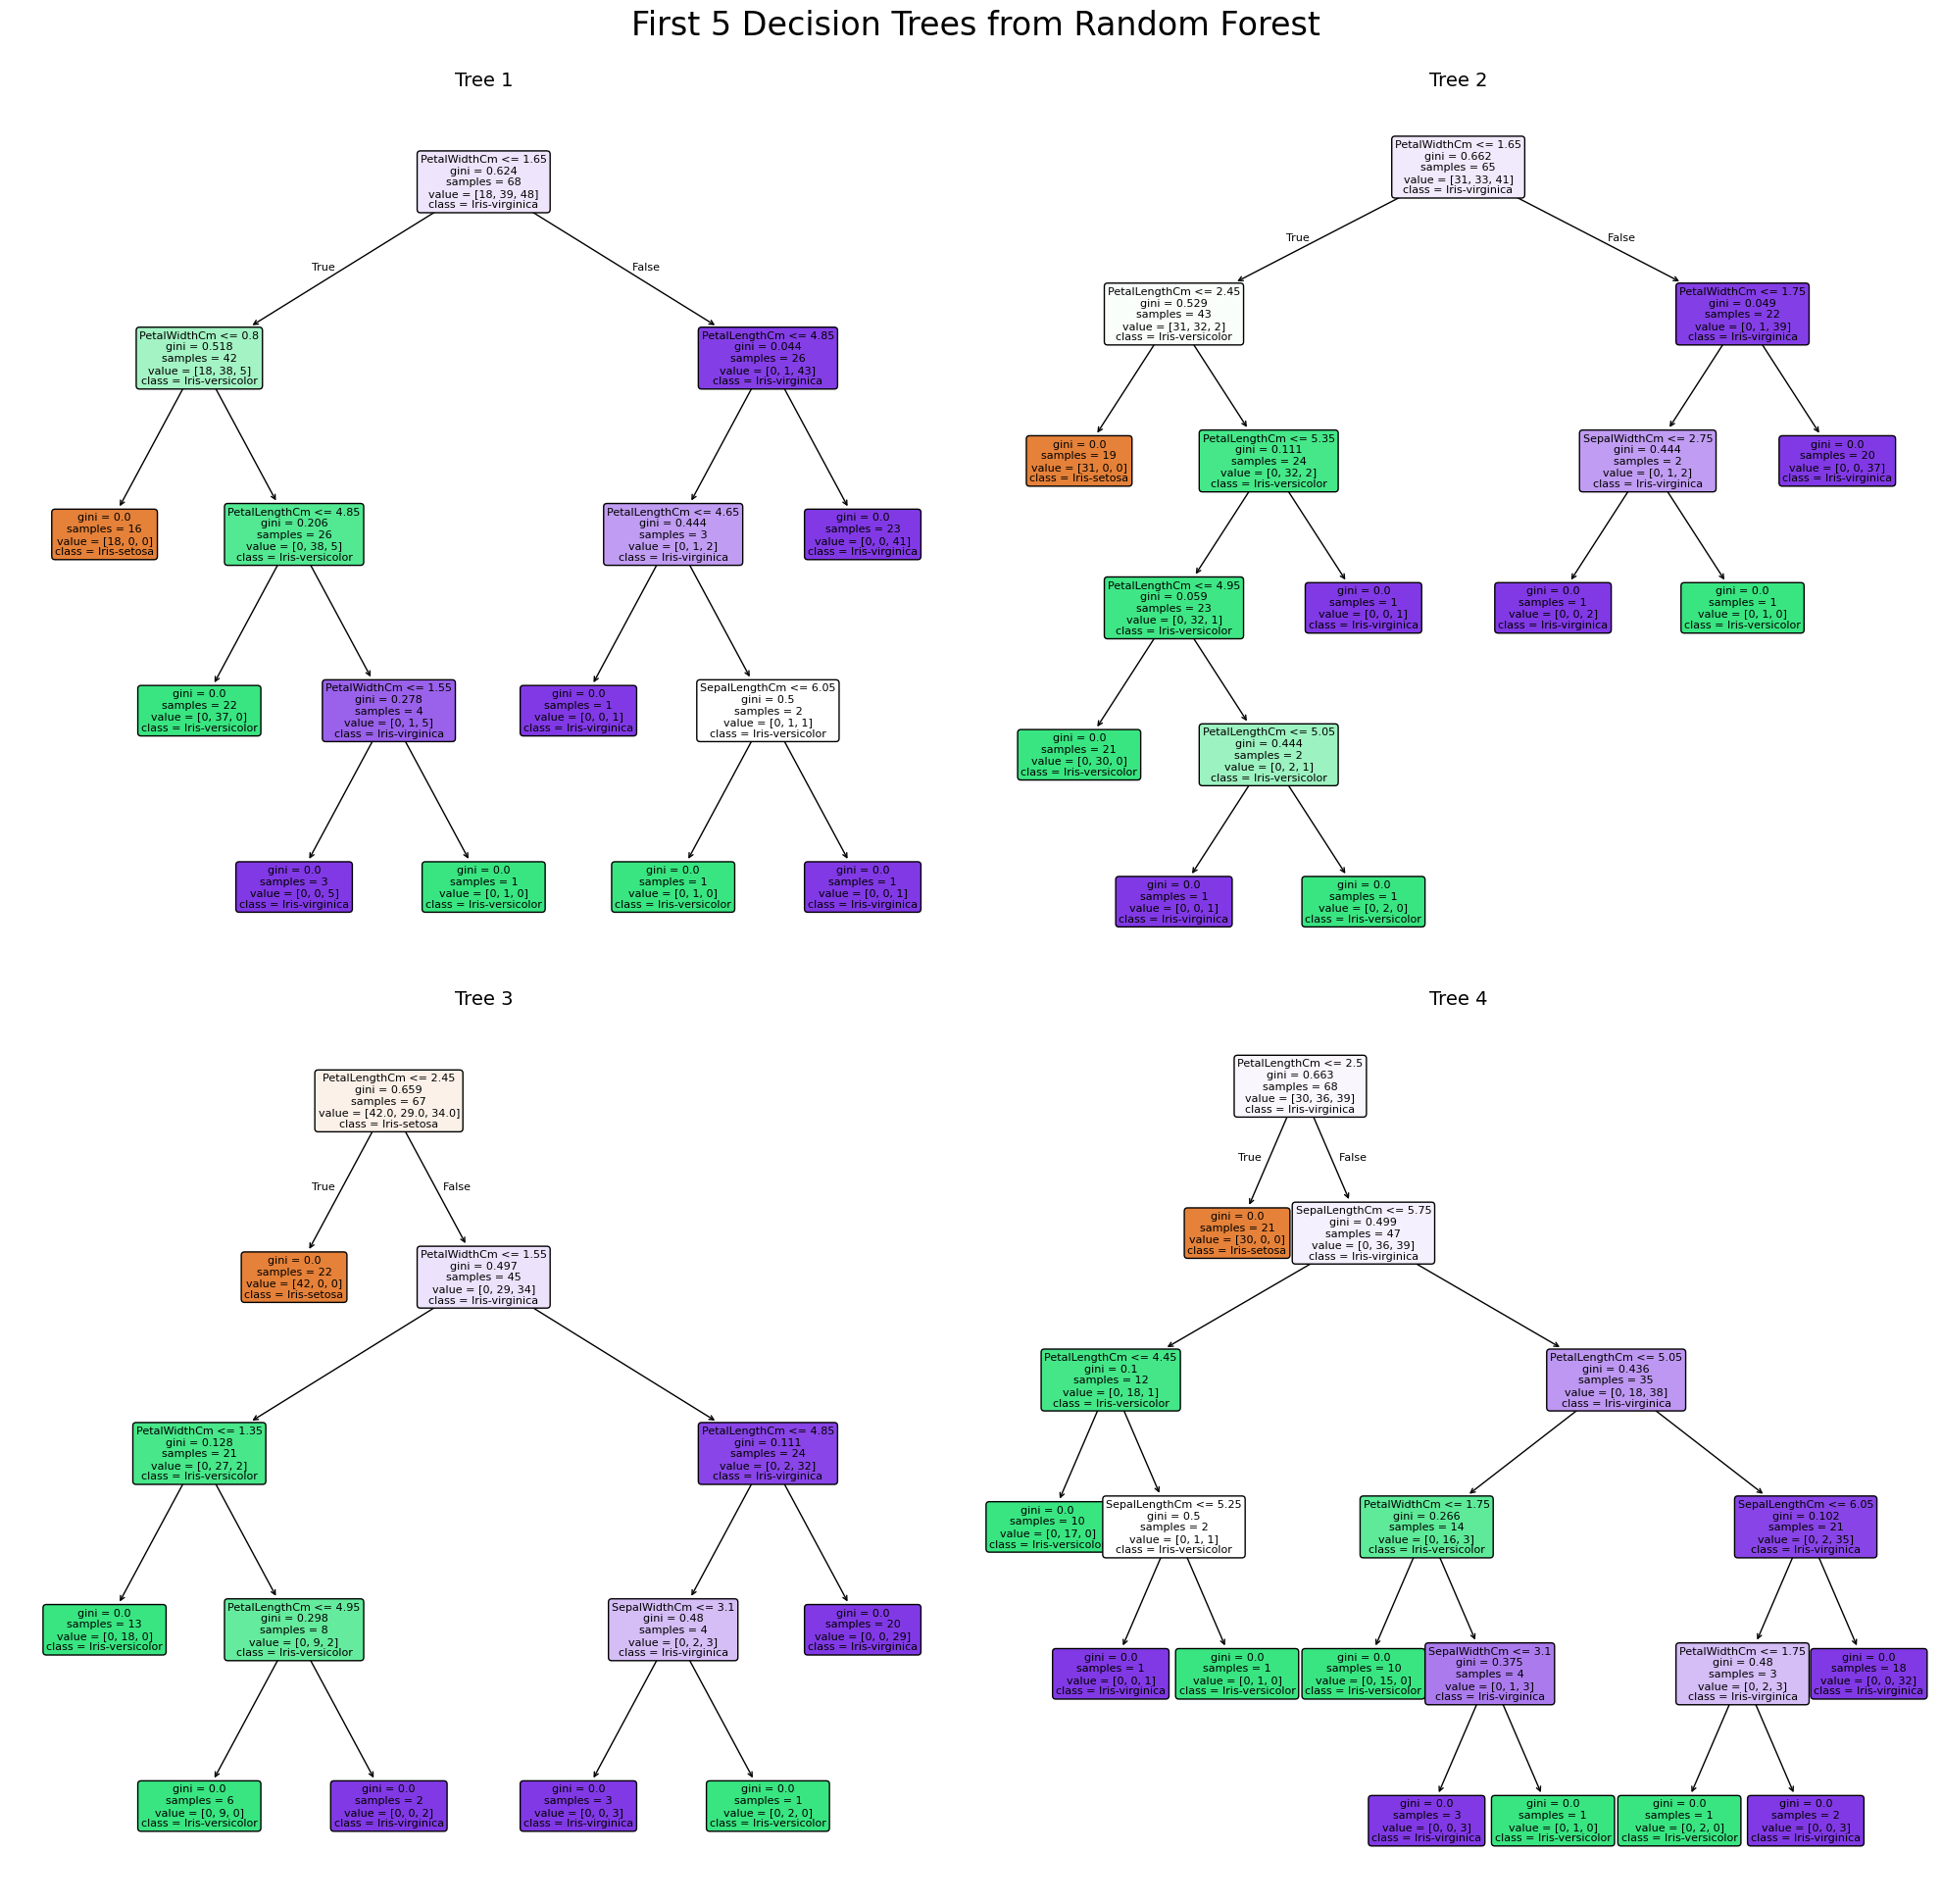

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


first_five_trees = rf_model.estimators_[:4]
feature_names = X.columns.tolist() # X is the feature DataFrame from your previous code
class_names = [str(c) for c in rf_model.classes_] # Get class names for better labels

# Plot each tree
plt.figure(figsize=(20, 10 * 5)) # Set a very large figure size (20 width, 50 height)
plt.suptitle("First 5 Decision Trees from Random Forest", fontsize=24)

for i, tree in enumerate(first_five_trees):
    plt.subplot(5, 2, i + 1) # 5 rows, 1 column for 5 plots

    # Use plot_tree to visualize the decision boundary of the tree
    plot_tree(
        tree,
        feature_names=feature_names,
        class_names=class_names,
        filled=True, # Color nodes to indicate majority class
        rounded=True, # Rounded box style
        fontsize=8,
        ax=plt.gca() # Use the current subplot
    )
    plt.title(f"Tree {i+1}", fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout
# plt.show() # Uncomment to display interactively
plt.savefig("first_five_rf_trees.png") # Save the plot to file